In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import torch
import xarray as xr
import pandas as pd
import os
import datetime
import seaborn as sns

import cartopy
import cartopy.crs as ccrs
from pyresample import load_area, geometry

import quantnn

In [2]:
f = open('../path_to_data.txt', "r")
path_to_dataset = os.path.join(f.readline().rstrip("\n"))
f.close() 

In [5]:
combined = xr.open_dataset(os.path.join(path_to_dataset,'combined.nc'))

In [8]:
combined

<xarray.Dataset>
Dimensions:                  (location: 609, time: 738)
Coordinates:
  * location                 (location) int64 0 1 2 3 4 ... 604 605 606 607 608
  * time                     (time) datetime64[ns] 2020-12-01T01:00:00 ... 20...
Data variables:
    xception_posterior_mean  (time, location) float32 ...
    xception_Q0.95           (time, location) float32 ...
    xception_Q0.99           (time, location) float32 ...
    mlp_posterior_mean       (time, location) float32 ...
    mlp_Q0.95                (time, location) float32 ...
    mlp_Q0.99                (time, location) float32 ...
    HE_precip                (time, location) float64 ...
    gauge_precip             (time, location) float64 ...

391


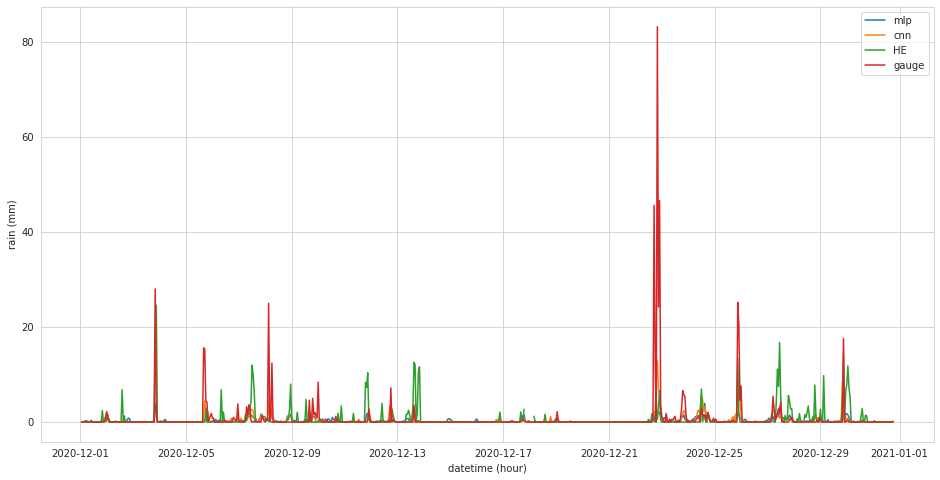

In [7]:
sns.set_style('whitegrid')
ind = 391 
print(ind)

fig, ax = plt.subplots(figsize=(16,8))
plt.plot(combined.time, combined.mlp_posterior_mean[:, ind], label='mlp')
plt.plot(combined.time, combined.xception_posterior_mean[:, ind], label='cnn')
plt.plot(combined.time, combined.HE_precip[:, ind], label='HE')
plt.plot(combined.time, combined.gauge_precip[:, ind], label='gauge')

ax.set_ylabel('rain (mm)')
ax.set_xlabel('datetime (hour)')
ax.legend()

In [21]:
np.nanmean(combined.gauge_precip-combined.HE_precip)

-0.10395083635324988

In [23]:
np.nanmean(combined.gauge_precip-combined.xception_posterior_mean)

-0.004699792821834452

In [24]:
np.nanmean(combined.gauge_precip-combined.mlp_posterior_mean)

0.020730019446901584

In [33]:
np.nanmean(np.square(np.subtract(combined.gauge_precip.values, combined.HE_precip.values)))

3.940874754925588

In [36]:
np.nanmean(np.square(np.subtract(combined.gauge_precip.values, combined.xception_posterior_mean.values)))

1.7017950619618278

In [35]:
np.nanmean(np.square(np.subtract(combined.gauge_precip.values, combined.mlp_posterior_mean.values)))

2.04128937113025

(array([4.18207e+05, 8.09400e+03, 4.64500e+03, 2.93500e+03, 2.11300e+03,
        1.57500e+03, 1.18100e+03, 9.28000e+02, 6.47000e+02, 5.59000e+02,
        4.60000e+02, 3.89000e+02, 3.03000e+02, 2.70000e+02, 1.94000e+02,
        1.40000e+02, 1.47000e+02, 1.13000e+02, 8.50000e+01, 6.30000e+01,
        5.30000e+01, 4.10000e+01, 4.20000e+01, 3.30000e+01, 2.70000e+01,
        3.00000e+01, 2.00000e+01, 1.50000e+01, 1.20000e+01, 7.00000e+00,
        9.00000e+00, 3.00000e+00, 4.00000e+00, 2.00000e+00, 2.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.   ,  1.168,  2.336,  3.504,  4.672,  5.84 ,  7.008,  8.176,
         9.344, 10.512, 11.68 , 12.848, 14.016, 15.184, 16.352, 17.52 ,
        18.688, 19.856, 21.024, 22.192, 23.36 , 24.528, 25.696, 26.864,
        28.032, 29.2  , 30.368, 31.536, 32.704, 33.8

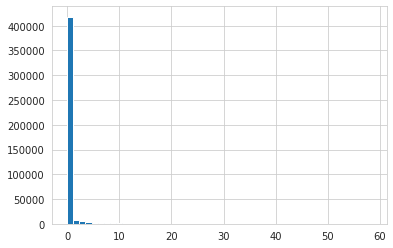

In [40]:
plt.hist(combined.HE_precip.values.flatten(), bins=50)

(array([4.15904e+05, 1.17900e+04, 6.14800e+03, 3.88700e+03, 2.59400e+03,
        1.88800e+03, 1.34300e+03, 9.98000e+02, 7.18000e+02, 5.50000e+02,
        4.18000e+02, 3.05000e+02, 2.14000e+02, 1.63000e+02, 1.61000e+02,
        1.17000e+02, 1.01000e+02, 7.80000e+01, 4.70000e+01, 4.10000e+01,
        3.20000e+01, 3.60000e+01, 2.50000e+01, 2.70000e+01, 1.10000e+01,
        1.10000e+01, 1.40000e+01, 9.00000e+00, 1.40000e+01, 4.00000e+00,
        5.00000e+00, 7.00000e+00, 4.00000e+00, 4.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 1.00000e+00, 3.00000e+00, 3.00000e+00,
        1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([3.3542429e-04, 6.2855339e-01, 1.2567713e+00, 1.8849894e+00,
        2.5132072e+00, 3.1414254e+00, 3.7696433e+00, 4.3978610e+00,
        5.0260792e+00, 5.6542974e+00, 6.2825150e+00, 6.9107332e+00,
        7.5389509e+00, 8.1671686e+00, 8.7953873e+00, 9.4236050e+

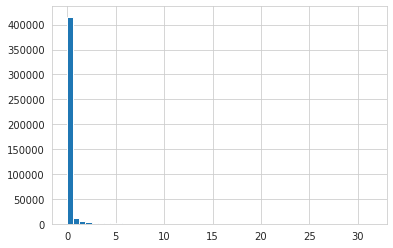

In [42]:
plt.hist(combined.xception_posterior_mean.values.flatten(), bins=50)

(array([3.86341e+05, 2.60590e+04, 1.30700e+04, 7.63000e+03, 4.95500e+03,
        3.24000e+03, 2.01200e+03, 1.29200e+03, 8.15000e+02, 5.21000e+02,
        3.78000e+02, 2.88000e+02, 2.02000e+02, 1.78000e+02, 1.25000e+02,
        9.00000e+01, 7.60000e+01, 6.00000e+01, 5.40000e+01, 4.80000e+01,
        3.80000e+01, 3.30000e+01, 2.60000e+01, 1.80000e+01, 1.60000e+01,
        1.80000e+01, 1.20000e+01, 9.00000e+00, 1.20000e+01, 1.20000e+01,
        1.40000e+01, 3.00000e+00, 1.00000e+00, 3.00000e+00, 3.00000e+00,
        4.00000e+00, 5.00000e+00, 5.00000e+00, 5.00000e+00, 3.00000e+00,
        1.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([-1.04688974e-02,  3.22379708e-01,  6.55228317e-01,  9.88076925e-01,
         1.32092559e+00,  1.65377414e+00,  1.98662281e+00,  2.31947136e+00,
         2.65231991e+00,  2.98516870e+00,  3.31801724e+00,  3.65086579e+00,
         3.98371458e+00,  4.31656313e+00

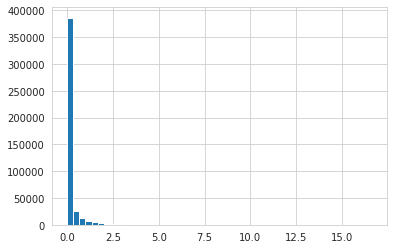

In [43]:
plt.hist(combined.mlp_posterior_mean.values.flatten(), bins=50)